In [ ]:
%cd /content
!rm -rf gan-tools2
!git clone --single-branch --depth=1 --branch main https://github.com/hannesdm/gan-tools2.git

/content
Cloning into 'gan-tools2'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 2), reused 13 (delta 2), pack-reused 0
Unpacking objects: 100% (16/16), 7.11 KiB | 2.37 MiB/s, done.
/content
Cloning into 'gan-tools2'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 2), reused 13 (delta 2), pack-reused 0
Unpacking objects: 100% (16/16), 7.11 KiB | 2.37 MiB/s, done.


In [ ]:
%cd /content/gan-tools2
import numpy as np
from keras.datasets import cifar10
import impl
from impl import *
from core import vis
from core import gan
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False

/content/gan-tools2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the cifar10 data
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.  <br/>
**Exercise** We will select a single class of this dataset to model. This can be done by setting the **model_class** variable to the corresponding class. <br/>
One cell lower, a few images of the selected class are shown.

In [ ]:
model_class = 5
(X_train_original, Y_train), (_, _) = cifar10.load_data()
X_train_single_class = X_train_original[np.where(np.squeeze(Y_train) == model_class)]
X_train = X_train_single_class / 127.5 - 1.

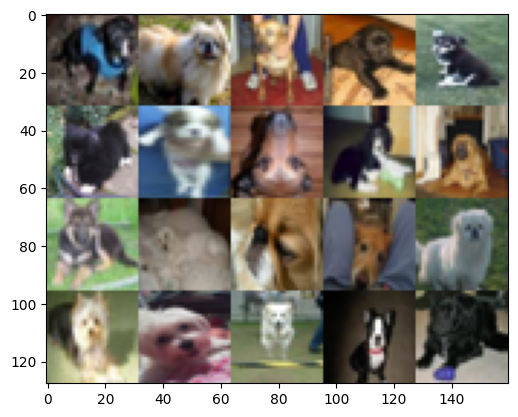

In [ ]:
grid = vis.image_grid(X_train_single_class[0:20], 5)
plt.imshow(grid)
plt.show()

## Train the DCGAN
<img src="https://i.imgur.com/NFUiEf5.png" width="450"> <br/>
The following code will train a GAN with a working DCGAN architecture. This training can be controlled by the following parameters:


*   **batches**: The number of batches the GAN should train on.
*   **batch_size**: The size of each batch.
*    **plot_interval**: After how many batches the generator should be sampled and the images shown.

The default parameters may be kept. <br/>
Make sure to train the GAN for a sufficient amount of time in order to see realistic samples. At any point, the training may be stopped by clicking on the stop button or on 'interrupt execution' in the runtime menu at the top of the page.<br/> In the same menu, the runtime type should also be changed to 'GPU'. This will speed up the training of the models. <br/>
**Exercise** Comment on the loss and accuracy of the generator and discriminator, shown during training and discuss its stability. Explain this in function of the GAN setting.





In [ ]:
gan_net = cifar10_dcgan()
gan_net.train(X_train, steps = 20000, batch_size=32, plot_interval = 200)
vis.show_gan_image_predictions(gan_net, 32)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Auxiliary function for plotting
def moving_average(a, n=10) :
    s = np.cumsum(a, dtype=float)
    s[n:] = s[n:] - s[:-n]
    return s[n - 1:] / n

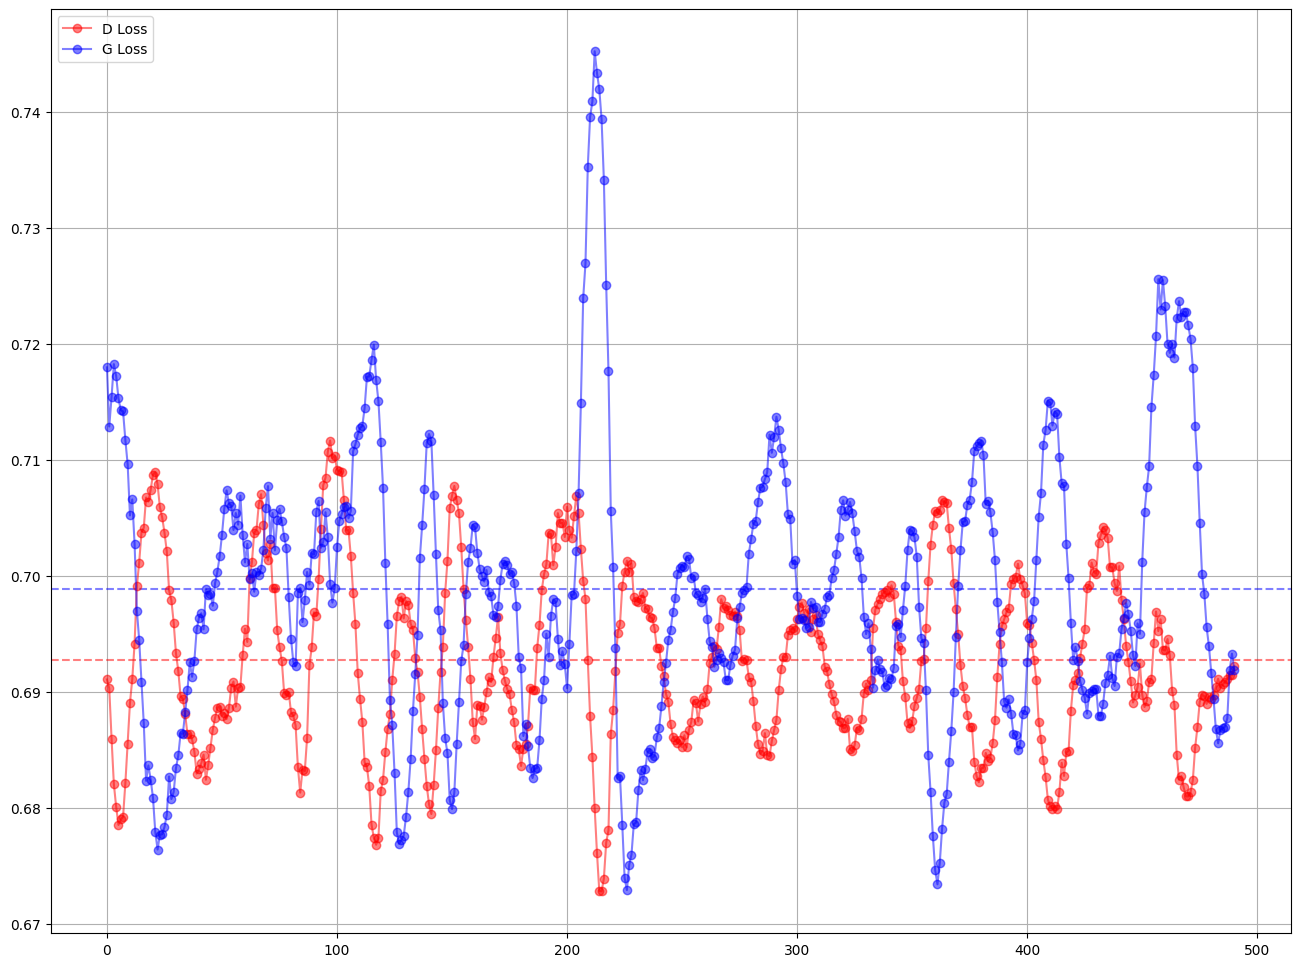

In [ ]:
plt.figure(figsize=(16, 12))
cutoff = 0.975
n = 10
alpha = 0.5
d_vals = moving_average(gan_net.d_losses[int(cutoff*len(gan_net.d_losses)):], n=n) 
d_mean = np.mean(d_vals)
plt.axhline(d_mean, ls="--", color="red",alpha=alpha)
g_vals = moving_average(gan_net.g_losses[int(cutoff*len(gan_net.g_losses)):], n=n) 
g_mean = np.mean(g_vals)
plt.axhline(g_mean, ls="--", color="blue",alpha=alpha)
plt.plot(d_vals, '-o', c="red", label="D Loss", alpha = alpha)
plt.plot(g_vals, '-o', c="blue", label="G Loss", alpha = alpha)
plt.legend(loc="upper left")
plt.grid()
plt.show()

Not so useful:

0.006135301082537277


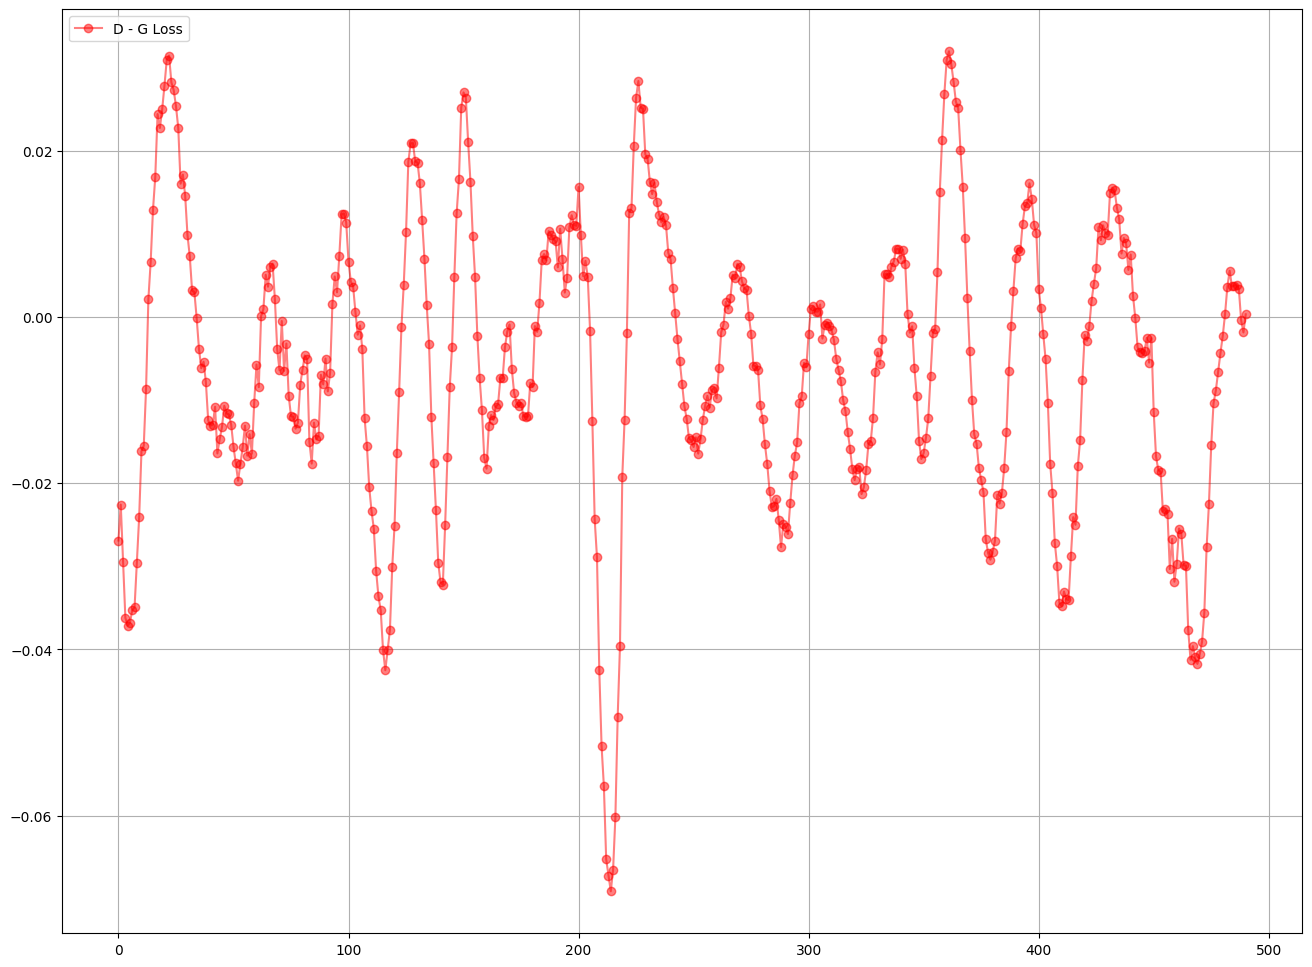

In [ ]:
# plt.figure(figsize=(16, 12))
# cutoff = 0.975
# n = 10
# alpha = 0.5
# d_vals = moving_average(gan_net.d_losses[int(cutoff*len(gan_net.d_losses)):], n=n) 
# g_vals = moving_average(gan_net.g_losses[int(cutoff*len(gan_net.g_losses)):], n=n) 
# plt.plot(d_vals - g_vals, '-o', c="red", label="D - G Loss", alpha = alpha)
# plt.legend(loc="upper left")
# print(abs(np.mean(d_vals - g_vals)))
# plt.grid()
# plt.show()

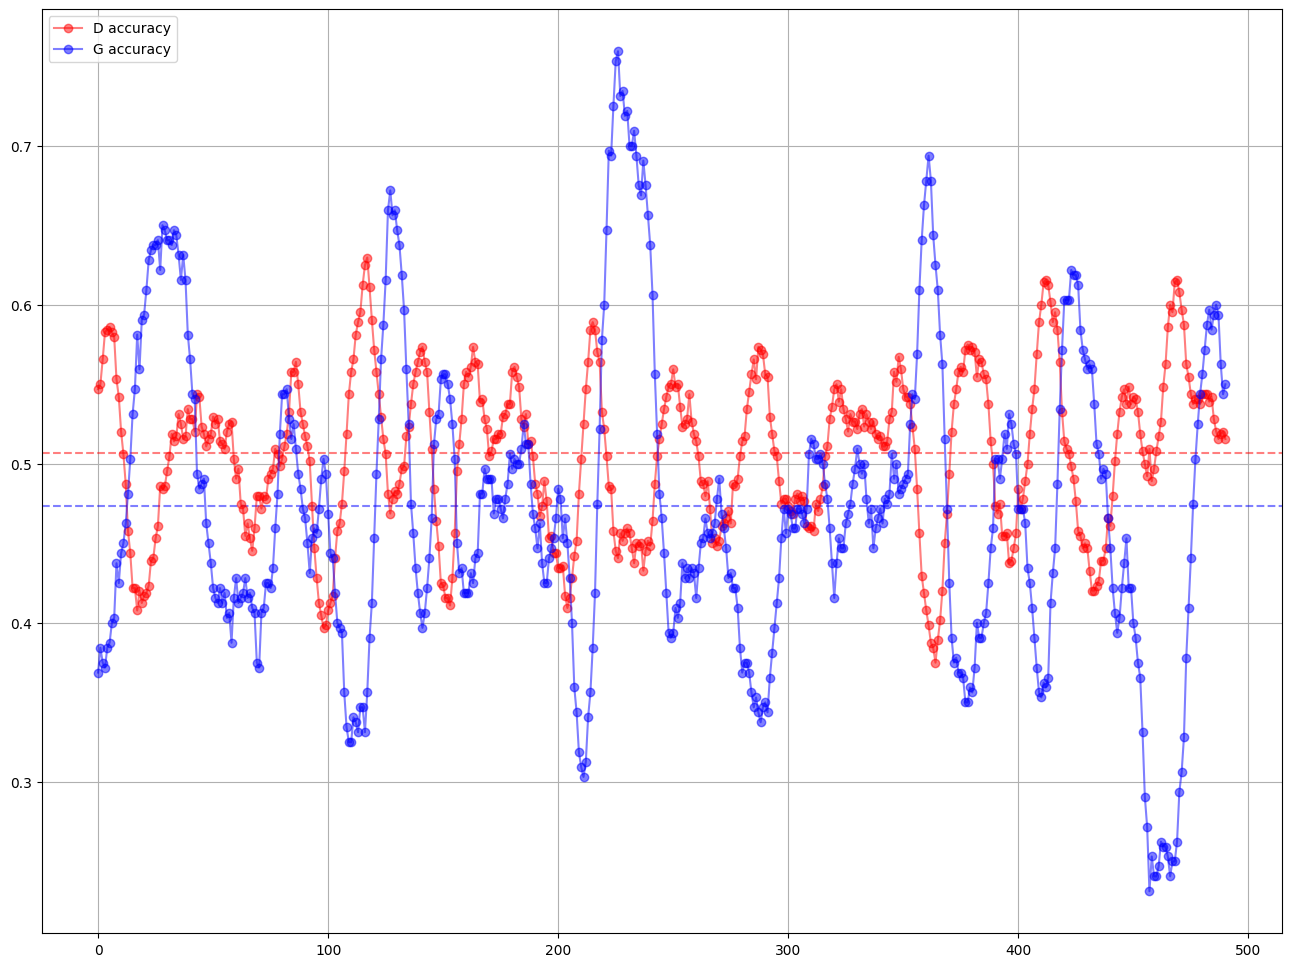

In [ ]:
plt.figure(figsize=(16, 12))
cutoff = 0.975
n = 10
alpha = 0.5
d_vals = moving_average(gan_net.d_accs[int(cutoff*len(gan_net.d_accs)):], n=n) 
d_mean = np.mean(d_vals)
plt.axhline(d_mean, ls="--", color="red",alpha=alpha)
g_vals = moving_average(gan_net.g_accs[int(cutoff*len(gan_net.g_accs)):], n=n) 
g_mean = np.mean(g_vals)
plt.axhline(g_mean, ls="--", color="blue",alpha=alpha)
plt.plot(d_vals, '-o', c="red", label="D accuracy", alpha = alpha)
plt.plot(g_vals, '-o', c="blue", label="G accuracy", alpha = alpha)
plt.legend(loc="upper left")
plt.grid()
plt.show()

Combine the above two plots into one big plot

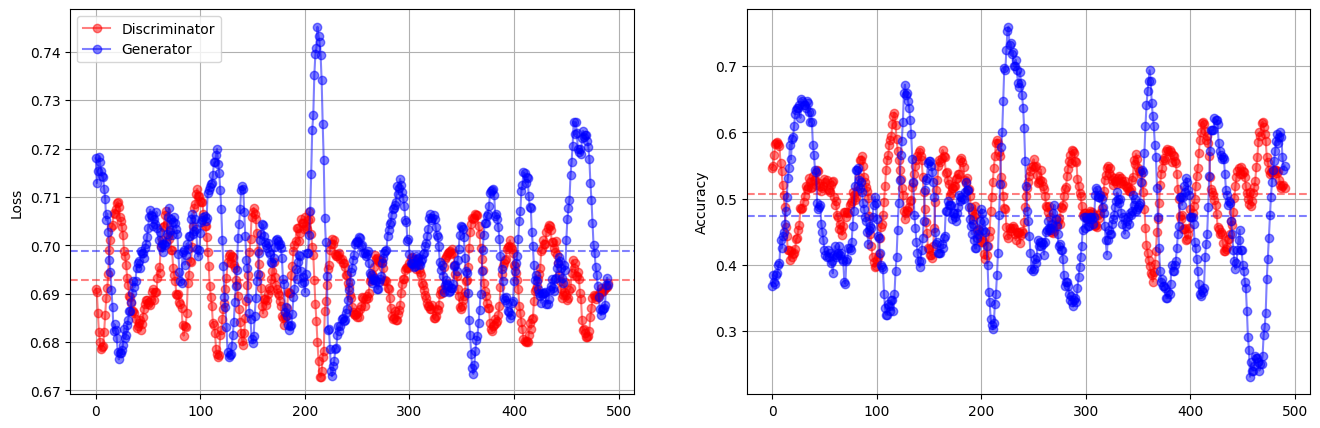

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5), sharex=True)
cutoff = 0.975
n = 10
alpha = 0.5
# Plot one
plt.subplot(121)
d_vals = moving_average(gan_net.d_losses[int(cutoff*len(gan_net.d_losses)):], n=n) 
d_mean = np.mean(d_vals)
plt.axhline(d_mean, ls="--", color="red",alpha=alpha)
g_vals = moving_average(gan_net.g_losses[int(cutoff*len(gan_net.g_losses)):], n=n) 
g_mean = np.mean(g_vals)
plt.axhline(g_mean, ls="--", color="blue",alpha=alpha)
plt.plot(d_vals, '-o', c="red", label="Discriminator", alpha = alpha)
plt.plot(g_vals, '-o', c="blue", label="Generator", alpha = alpha)
plt.legend(loc="upper left")
plt.ylabel("Loss")
plt.grid()
# Second subplot
plt.subplot(122)
d_vals = moving_average(gan_net.d_accs[int(cutoff*len(gan_net.d_accs)):], n=n) 
d_mean = np.mean(d_vals)
plt.axhline(d_mean, ls="--", color="red",alpha=alpha)
g_vals = moving_average(gan_net.g_accs[int(cutoff*len(gan_net.g_accs)):], n=n) 
g_mean = np.mean(g_vals)
plt.axhline(g_mean, ls="--", color="blue",alpha=alpha)
plt.plot(d_vals, '-o', c="red", label="D accuracy", alpha = alpha)
plt.plot(g_vals, '-o', c="blue", label="G accuracy", alpha = alpha)
# plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Accuracy")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Plots/DCGAN.pdf', bbox_inches="tight")
plt.show()

*Save the data*

In [ ]:
import pickle

In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Data/DCGAN_g_losses.pickle', 'wb') as handle:
#     pickle.dump(gan_net.g_losses, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Data/DCGAN_d_losses.pickle', 'wb') as handle:
#     pickle.dump(gan_net.d_losses, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Data/DCGAN_g_accs.pickle', 'wb') as handle:
#     pickle.dump(gan_net.g_accs, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Data/DCGAN_d_accs.pickle', 'wb') as handle:
#     pickle.dump(gan_net.d_accs, handle, protocol=pickle.HIGHEST_PROTOCOL)


Load the data again here:

In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Data/DCGAN_d_accs.pickle', 'rb') as handle:
#     b = pickle.load(handle)

## Stability in GANs
Sadly, training a GAN is not always easy. <br/>
Stability during training is important for both discriminator and generator to learn. <br/>
Below is a short video (50s) showing the intermediate results of a GAN being trained on mnist. The final result is a phenomenon known as 'mode collapse'.
<br/><img src='https://i.imgur.com/lG35xDP.gif'>

## Optional: High Quality Image Generation with StyleGAN

The DCGAN model was an important point in the history of generative adversarial networks. However, these models have difficulty with high resolution images and have long been passed by the current state of the art. </br>
State of the art models for high resolution image generation, such as BigGAN and StyleGAN, can generate new images with high fidelity of e.g. 1024x1024 image data sets. The trade-off is that these models can require weeks to train even with the best GPUs and/or TPUs available. </br>
</br>
**Few-shot learning** A special setting for training generative models is low-shot/few-shot learning where one attempts to create a model that generalizes well on as few samples as possible. This setting allows the power of the state of the art models to be demonstrated while still being able to be trained in a reasonable time. </br>

**StyleGAN few-shot**
The following script allows you to train a StyleGAN with differentiable augmentations on your own data. Few-shot models work best with uniform, clean data where the object takes up the majority of the image.</br>
To the left of Google Colab, click the folder icon on the sidebar, create a new folder in the file explorer and upload your images into it. It's recommended to have at least 100 images of the same width and height. Tip: you can quickly resize all images in a directory using the *imgp* or *convert* commands from a command line.</br> Next, replace the placeholder in the command below with the link to your uploaded folder (e.g. /content/mydata) and execute the command. It's recommended to try out different types of data to see what works and what doesn't.</br>
Alternatively, replace the placeholder by the name of one of the pre-existing data sets (e.g. --data=https://hanlab.mit.edu/projects/data-efficient-gans/datasets/100-shot-obama.zip):

*   100-shot-obama: https://hanlab.mit.edu/projects/data-efficient-gans/datasets/100-shot-obama.zip
*   100-shot-grumpy_cat: https://hanlab.mit.edu/projects/data-efficient-gans/datasets/100-shot-grumpy_cat.zip
*   100-shot-panda: https://hanlab.mit.edu/projects/data-efficient-gans/datasets/100-shot-panda.zip
*   100-shot-bridge_of_sighs: https://hanlab.mit.edu/projects/data-efficient-gans/datasets/100-shot-bridge_of_sighs.zip
*   100-shot-temple_of_heaven: https://hanlab.mit.edu/projects/data-efficient-gans/datasets/100-shot-temple_of_heaven.zip
*   100-shot-wuzhen: https://hanlab.mit.edu/projects/data-efficient-gans/datasets/100-shot-wuzhen.zip

The script will output intermediate images while training. More full quality samples can be found in the /content/stylegan-lowshot/pytorch/results folder. Take note that it can take multiple hours before reasonable images start to be generated even when working with these very small data sets.
Before running the train script below, restart the runtime.






In [ ]:
%cd /content

!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install ninja

! rm -rf stylegan-lowshot
!git clone --single-branch --depth=1 --branch main https://github.com/hannesdm/stylegan-lowshot.git

In [ ]:
%cd /content/stylegan-lowshot/pytorch/
%run train.py --outdir=results --data=https://data-efficient-gans.mit.edu/datasets/100-shot-wuzhen.zip --gpus=1 --snap=1